In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import calendar
import matplotlib.pyplot as plt
%matplotlib inline
from subprocess import check_output
from sklearn.model_selection import cross_val_score
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['nyc-taxi-trip-duration', 'weather-nyc']


In [2]:
!ls ../input

nyc-taxi-trip-duration	weather-nyc


In [3]:
!head -n 5 ../input/nyc-taxi-trip-duration/sample_submission.csv

id,trip_duration
id3004672,959
id3505355,959
id1217141,959
id2150126,959


## Read Data

In [4]:
data_f1= pd.read_csv("../input/nyc-taxi-trip-duration/train.csv")
test= pd.read_csv("../input/nyc-taxi-trip-duration/test.csv")
data_f1.shape

(1458644, 11)

In [5]:
weather= pd.read_csv("../input/weather-nyc/KNYC_Metars.csv")
weather.shape

(8787, 14)

|## Info

In [6]:
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [7]:
data_f1.set_index("id", inplace=False)
test= test.set_index("id", inplace=False)

In [8]:
weather.head()

,Time,Temp.,Windchill,Heat Index,Humidity,Pressure,Dew Point,Visibility,Wind Dir,Wind Speed,Gust Speed,Precip,Events,Conditions
0,2015-12-31 02:00:00,7.8,7.1,NaN,0.89,1017.0,6.1,8.0,NNE,5.6,0.0,0.8,None,Overcast
1,2015-12-31 03:00:00,7.2,5.9,NaN,0.90,1016.5,5.6,12.9,Variable,7.4,0.0,0.3,None,Overcast
2,2015-12-31 04:00:00,7.2,NaN,NaN,0.90,1016.7,5.6,12.9,Calm,0.0,0.0,0.0,None,Overcast
3,2015-12-31 05:00:00,7.2,5.9,NaN,0.86,1015.9,5.0,14.5,NW,7.4,0.0,0.0,None,Overcast
4,2015-12-31 06:00:00,7.2,6.4,NaN,0.90,1016.2,5.6,11.3,West,5.6,0.0,0.0,None,Overcast


In [9]:
data_f1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [10]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8787 entries, 0 to 8786
Data columns (total 14 columns):
Time          8787 non-null object
Temp.         8787 non-null float64
Windchill     2295 non-null float64
Heat Index    815 non-null float64
Humidity      8787 non-null float64
Pressure      8556 non-null float64
Dew Point     8787 non-null float64
Visibility    8550 non-null float64
Wind Dir      8787 non-null object
Wind Speed    8787 non-null float64
Gust Speed    8787 non-null float64
Precip        8787 non-null float64
Events        8787 non-null object
Conditions    8787 non-null object
dtypes: float64(10), object(4)
memory usage: 961.2+ KB


In [11]:
data_f1.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [12]:
data_f1.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

## Format datetime

In [13]:
test.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
id,,,,,,,,
id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [14]:
test['pickup_datetime']=pd.to_datetime(test['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')
data_f1.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [15]:
data_f1['pickup_datetime']=pd.to_datetime(data_f1['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')
data_f1['dropoff_datetime']=pd.to_datetime(data_f1['dropoff_datetime'],format='%Y-%m-%d %H:%M:%S')
data_f1.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [16]:
data_f1["pickup_datetime_month"]= data_f1["pickup_datetime"].dt.month
data_f1["dropoff_datetime_month"]= data_f1["dropoff_datetime"].dt.month

In [17]:
test['pickup_day_of_week']=test['pickup_datetime'].apply(lambda x:calendar.day_name[x.weekday()])

In [18]:
data_f1['pickup_day_of_week']=data_f1['pickup_datetime'].apply(lambda x:calendar.day_name[x.weekday()])
data_f1['drop_off_day_of_week']=data_f1['dropoff_datetime'].apply(lambda x:calendar.day_name[x.weekday()])

## Trip Duration

In [19]:
print(data_f1["trip_duration"].mean())

print(data_f1["trip_duration"].min())

print(data_f1["trip_duration"].max())

959.4922729603659
1
3526282


##  Data Exploration

In [20]:
one = data_f1.groupby('vendor_id').count()['id'].iloc[0:1]
two = data_f1.groupby('vendor_id').count()['id'].iloc[1:2]

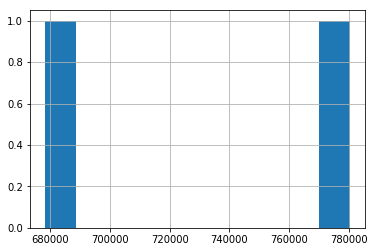

In [21]:
data_f1.groupby('vendor_id').count()['id'].hist();

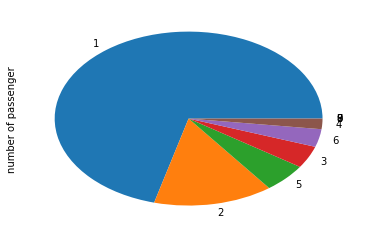

In [22]:
data_f1['passenger_count'].value_counts(normalize=True).plot(kind="pie", label= "number of passenger");

In [23]:
data_f1["trip_duration_time"]= data_f1['dropoff_datetime']-data_f1['pickup_datetime']

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'trip duration on second')

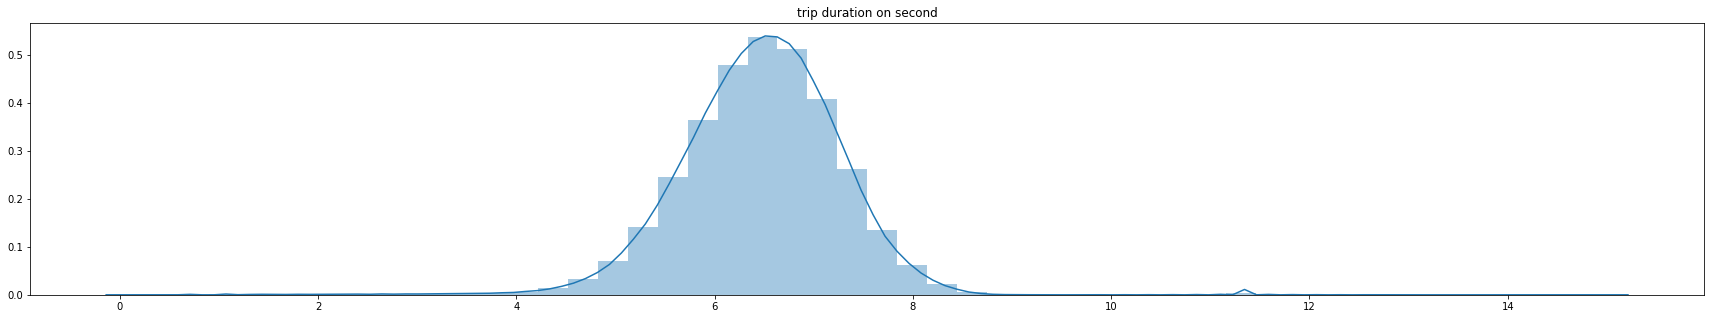

In [24]:
plt.figure(figsize=(30,5))
sns.distplot(np.log(data_f1['trip_duration'].values))
plt.title("trip duration on second")

In [25]:
data_f1['distance_long'] = data_f1['pickup_longitude'] - data_f1['dropoff_longitude']
test['distance_long'] = test['pickup_longitude'] - test['dropoff_longitude']

data_f1['distance_lat'] = data_f1['pickup_latitude'] - data_f1['dropoff_latitude']
test['distance_lat'] = test['pickup_latitude'] - test['dropoff_latitude']

data_f1['distance'] = np.sqrt(np.square(data_f1['distance_long']) + np.square(data_f1['distance_lat']))
test['distance'] = np.sqrt(np.square(test['distance_long']) + np.square(test['distance_lat']))
data_f1['distance'].mean()

0.035482322724517366

Text(0.5,1,'map of taxi in new york')

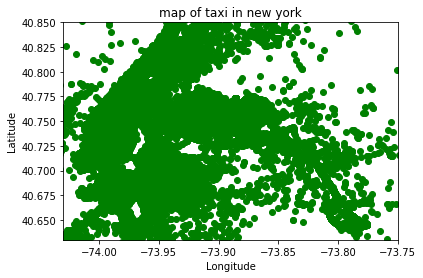

In [26]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
fig, ax = plt.subplots(ncols=1, sharex=True, sharey=True);
ax.scatter(data_f1['pickup_longitude'], data_f1['pickup_latitude'],color='green')
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.title("map of taxi in new york")

## Preparting model

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [28]:
test.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_day_of_week,distance_long,distance_lat,distance
id,,,,,,,,,,,,
id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,Thursday,0.002045,-0.024651,0.024735
id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,Thursday,-0.004395,0.024590,0.024979
id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,Thursday,-0.011276,0.008060,0.013861
id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,Thursday,0.030357,0.041431,0.051363
id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,Thursday,-0.008705,0.005585,0.010343


In [29]:
data_f1.set_index('id', inplace=True)
data_f1.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_datetime_month,dropoff_datetime_month,pickup_day_of_week,drop_off_day_of_week,trip_duration_time,distance_long,distance_lat,distance
id,,,,,,,,,,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,3,3,Monday,Monday,00:07:35,-0.017525,0.002335,0.017680
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,6,Sunday,Sunday,00:11:03,0.019066,0.007412,0.020456
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,1,Tuesday,Tuesday,00:35:24,0.026306,0.053852,0.059934
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,4,4,Wednesday,Wednesday,00:07:09,0.002228,0.013252,0.013438
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,3,3,Saturday,Saturday,00:07:15,-0.000130,0.010689,0.010690


In [30]:
data_f1.drop(['pickup_datetime', 'dropoff_datetime', 
              'pickup_datetime_month', 'trip_duration_time',
              'dropoff_datetime_month', 'drop_off_day_of_week'], axis=1, inplace=True)
data_f1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1458644 entries, id2875421 to id1209952
Data columns (total 12 columns):
vendor_id             1458644 non-null int64
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
pickup_day_of_week    1458644 non-null object
distance_long         1458644 non-null float64
distance_lat          1458644 non-null float64
distance              1458644 non-null float64
dtypes: float64(7), int64(3), object(2)
memory usage: 144.7+ MB


In [31]:
test.drop(['pickup_datetime'], axis=1, inplace=True)

In [32]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 625134 entries, id3004672 to id0621643
Data columns (total 11 columns):
vendor_id             625134 non-null int64
passenger_count       625134 non-null int64
pickup_longitude      625134 non-null float64
pickup_latitude       625134 non-null float64
dropoff_longitude     625134 non-null float64
dropoff_latitude      625134 non-null float64
store_and_fwd_flag    625134 non-null object
pickup_day_of_week    625134 non-null object
distance_long         625134 non-null float64
distance_lat          625134 non-null float64
distance              625134 non-null float64
dtypes: float64(7), int64(2), object(2)
memory usage: 57.2+ MB


In [33]:
data_f1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1458644 entries, id2875421 to id1209952
Data columns (total 12 columns):
vendor_id             1458644 non-null int64
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
pickup_day_of_week    1458644 non-null object
distance_long         1458644 non-null float64
distance_lat          1458644 non-null float64
distance              1458644 non-null float64
dtypes: float64(7), int64(3), object(2)
memory usage: 144.7+ MB


In [34]:
for c in data_f1.select_dtypes('object').columns:
    data_f1[c] = data_f1[c].astype('category').cat.codes

data_f1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1458644 entries, id2875421 to id1209952
Data columns (total 12 columns):
vendor_id             1458644 non-null int64
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null int8
trip_duration         1458644 non-null int64
pickup_day_of_week    1458644 non-null int8
distance_long         1458644 non-null float64
distance_lat          1458644 non-null float64
distance              1458644 non-null float64
dtypes: float64(7), int64(3), int8(2)
memory usage: 125.2+ MB


In [35]:
for c in test.select_dtypes('object').columns:
    test[c] = test[c].astype('category').cat.codes

test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 625134 entries, id3004672 to id0621643
Data columns (total 11 columns):
vendor_id             625134 non-null int64
passenger_count       625134 non-null int64
pickup_longitude      625134 non-null float64
pickup_latitude       625134 non-null float64
dropoff_longitude     625134 non-null float64
dropoff_latitude      625134 non-null float64
store_and_fwd_flag    625134 non-null int8
pickup_day_of_week    625134 non-null int8
distance_long         625134 non-null float64
distance_lat          625134 non-null float64
distance              625134 non-null float64
dtypes: float64(7), int64(2), int8(2)
memory usage: 48.9+ MB


In [36]:
X_train = data_f1.drop('trip_duration', axis=1)
y_train = data_f1['trip_duration']

In [37]:
rf = RandomForestRegressor(n_estimators=10, random_state=42)

In [38]:
X_train.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_day_of_week,distance_long,distance_lat,distance
id,,,,,,,,,,,
id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,0,1,-0.017525,0.002335,0.017680
id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,0,3,0.019066,0.007412,0.020456
id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,0,5,0.026306,0.053852,0.059934
id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,0,6,0.002228,0.013252,0.013438
id2181028,2,1,-73.973053,40.793209,-73.972923,40.782520,0,2,-0.000130,0.010689,0.010690


In [39]:

y_train = np.log1p(y_train)

In [40]:
#cvscore =  cross_val_score(rf, X, y, cv=5, scoring='neg_mean_squared_error')
#np.mean(np.sqrt(-cvscore))

In [41]:
#print('cross_val_score average: ', np.mean(np.sqrt(-cvscore)))

## Model

### Random Forest

In [42]:
%%time
rf.fit(X_train, y_train)

CPU times: user 3min 55s, sys: 3.87 s, total: 3min 59s
Wall time: 3min 59s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [43]:
valid_pred_rf = rf.predict(test)
valid_pred_rf = np.expm1(valid_pred_rf)

## Submission

In [44]:
valid_pred_rf_df = pd.DataFrame(valid_pred_rf, index=test.index)
valid_pred_rf_df.columns = ['trip_duration']
valid_pred_rf_df.to_csv('submit_file.csv')
pd.read_csv('submit_file.csv').head()

,id,trip_duration
0,id3004672,998.774114
1,id3505355,648.854446
2,id1217141,632.838947
3,id2150126,1092.267030
4,id1598245,355.431759
